In [29]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten


In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/final_modell2_95p07.h5')

OSError: No file or directory found at /content/drive/MyDrive/final_modell2_95p07.h5

In [ ]:
datadirectory2 = "/content/drive/MyDrive/FER2013/test/"
classes2 = ["angry","disgust","fear","happy","neutral","sad","surprise"]

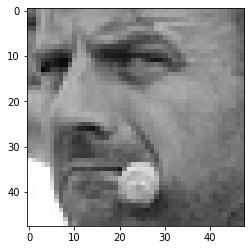

In [ ]:
for category in classes2:
  path = os.path.join(datadirectory2 , category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break  

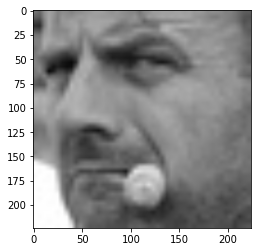

In [ ]:
new_array2 = cv2.resize(img_array,(224, 224))
plt.imshow(cv2.cvtColor(new_array2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
testing_data = []
def create_testing_Data():
  for category in classes2:
    path = os.path.join(datadirectory2 , category)
    class_num = classes2.index(category)   #Labeling or indexing
    for img in os.listdir(path):
       try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array2 = cv2.resize(img_array,(224 , 224))
            testing_data.append([new_array2 , class_num])
       except Exception as e:
            pass  

In [ ]:
create_testing_Data()

In [ ]:
x_test = []  # data / feature
y_test = [] #label / numbering
for features,label in testing_data:
  x_test.append(features)
  y_test.append(label)

x_test = np.array(x_test).reshape(-1, 224, 224, 3)
x_test = x_test/255.0

NameError: name 'testing_data' is not defined

In [ ]:
_test= np.array(x_test)
Y_test= np.array(y_test)

In [ ]:
score = new_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])
# 120/225 after this post accuracy is degrading.

In [ ]:
score

[18.56785774230957, 0.3921705186367035]

In [ ]:
model = tf.keras.models.load_model('final_modell2_95p07.h5')
classes2 = ["angry","disgust","fear","happy","neutral","sad","surprise"]

In [ ]:
img = cv2.imread(r'Training_659019.jpg')
img=cv2.resize(img,(224,224))
img = np.expand_dims(img, axis=0)
pred=model.predict(img)
print(pred)
print(np.argmax(pred))

1/1 [==============================] - 0s 114ms/step
[[1.1305159e-03 9.8333031e-01 7.4775652e-03 8.0615729e-03 2.0866617e-09
  2.2221427e-09 1.9664539e-09]]
1


In [ ]:
cap = cv2.VideoCapture(0)
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    ret,frame=cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    detection = cascade_classifier.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in detection:       
        frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        img_crop=frame[y:y+h,x:x+w]
        img_crop=cv2.resize(img_crop,(224,224))
        img_crop = np.expand_dims(img_crop, axis=0)
        pred = model.predict(img_crop)
        # print(pred)
        label = np.argmax(pred)
        cv2.putText(frame, str(classes2[label]), (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
        
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 77ms/step
